**Importing libraries**

In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F

import os
print(os.listdir("cell_images/cell_images/"))  # list your directory where you have stored the model.

['Parasitized', 'Uninfected']


In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [14]:
train_transforms = transforms.Compose([transforms.Resize((120, 120)),
                                       transforms.ColorJitter(0.05),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(20),
                                       transforms.ToTensor(), 
                                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                                     ])

> Loading a images using generic dataloader ImageFolder.

In [21]:
image_dir = "cell_images/cell_images/"
train_set = datasets.ImageFolder(image_dir, transform=train_transforms)

In [22]:
train_set

Dataset ImageFolder
    Number of datapoints: 27558
    Root location: cell_images/cell_images/
    StandardTransform
Transform: Compose(
               Resize(size=(120, 120), interpolation=PIL.Image.BILINEAR)
               ColorJitter(brightness=[0.95, 1.05], contrast=None, saturation=None, hue=None)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=(-20, 20), resample=False, expand=False)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [25]:
train_set.classes

['Parasitized', 'Uninfected']

In [28]:
train_set.imgs

[('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_163.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_164.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_165.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_166.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_167.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_168.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_169.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_170.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_171.png',
  0),
 ('cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_201

### Creating a dataset

In [33]:
test_size = 0.2

num_train = len(train_set) #27557
print('num_train',num_train)


indices = list(range(num_train)) #[1,2,3,4,5............27557]

print('Random Shuffle',np.random.shuffle(indices)) # Shuffles all the indices in list ordered to random shuffle.
print('indices',indices)


test_split = int(np.floor((test_size) * num_train)) #0.2*27557=5511
print('test_split',test_split)




test_index, train_index = indices[:test_split - 1], indices[test_split - 1:] #indices[:5511] - test_indexes, indices[5511:] = train_indexes.

print('test_index',test_index)
print('train_index',train_index)



train_sampler = SubsetRandomSampler(train_index) #SubsetRandomSampler arguments are train/test indices.
test_sampler = SubsetRandomSampler(test_index) ##SubsetRandomSampler arguments are train/test indices.
print('train_sampler',train_sampler) 
print('test_sampler',test_sampler)





train_loader = DataLoader(train_set, sampler=train_sampler, batch_size=104) #Creating a dataloader(i.e, train_loader/test_loader with the SubsetRandomSampler.)
print('train_loader',train_loader)



test_loader = DataLoader(train_set, sampler=test_sampler, batch_size=58)
print('test_loader',test_loader)
print("Images in Test set: {}\nImages in Train set: {}".format(len(test_index), len(train_index)))

num_train 27558
Random Shuffle None


indices [18294, 26624, 14915, 1164, 13581, 14231, 8246, 11836, 24938, 26523, 6749, 21384, 7488, 16188, 1121, 3770, 24290, 7573, 16116, 24857, 26336, 15428, 26812, 9073, 25777, 7625, 23212, 19039, 5944, 12850, 10262, 7245, 11569, 14400, 20769, 21082, 2854, 28, 19966, 14483, 6752, 15844, 6765, 18293, 12071, 4579, 680, 16643, 9902, 16115, 22936, 10893, 20365, 10747, 11025, 15229, 20945, 10080, 4031, 7651, 4544, 5411, 274, 12526, 11240, 18418, 11146, 3917, 12733, 8429, 16332, 19668, 20133, 20592, 23632, 7240, 13800, 16465, 622, 6255, 4026, 6394, 14335, 346, 21132, 7759, 19901, 20765, 13954, 22482, 12530, 2590, 20843, 8829, 1028, 4489, 14292, 13678, 8427, 12655, 8496, 19297, 15345, 2993, 1652, 9126, 25645, 20451, 2888, 26972, 23474, 11235, 4556, 12301, 10485, 26768, 18166, 8424, 25863, 4931, 2417, 7860, 19799, 17061, 26731, 19856, 21447, 19694, 6441, 14690, 8871, 6842, 16993, 8238, 7296, 9896, 18423, 454, 26346, 20054, 12345, 25897, 19927, 1972, 7241, 26199, 2223, 1826, 13168, 6984, 5403, 3

test_split 5511


test_index [18294, 26624, 14915, 1164, 13581, 14231, 8246, 11836, 24938, 26523, 6749, 21384, 7488, 16188, 1121, 3770, 24290, 7573, 16116, 24857, 26336, 15428, 26812, 9073, 25777, 7625, 23212, 19039, 5944, 12850, 10262, 7245, 11569, 14400, 20769, 21082, 2854, 28, 19966, 14483, 6752, 15844, 6765, 18293, 12071, 4579, 680, 16643, 9902, 16115, 22936, 10893, 20365, 10747, 11025, 15229, 20945, 10080, 4031, 7651, 4544, 5411, 274, 12526, 11240, 18418, 11146, 3917, 12733, 8429, 16332, 19668, 20133, 20592, 23632, 7240, 13800, 16465, 622, 6255, 4026, 6394, 14335, 346, 21132, 7759, 19901, 20765, 13954, 22482, 12530, 2590, 20843, 8829, 1028, 4489, 14292, 13678, 8427, 12655, 8496, 19297, 15345, 2993, 1652, 9126, 25645, 20451, 2888, 26972, 23474, 11235, 4556, 12301, 10485, 26768, 18166, 8424, 25863, 4931, 2417, 7860, 19799, 17061, 26731, 19856, 21447, 19694, 6441, 14690, 8871, 6842, 16993, 8238, 7296, 9896, 18423, 454, 26346, 20054, 12345, 25897, 19927, 1972, 7241, 26199, 2223, 1826, 13168, 6984, 5403

train_index [18185, 16798, 21272, 10947, 9692, 21755, 20482, 6409, 25850, 8169, 19998, 3409, 26465, 4650, 24883, 1494, 6965, 22469, 21303, 7637, 13065, 21025, 7102, 9172, 9644, 21690, 3887, 2504, 10373, 8732, 20955, 20424, 2784, 12046, 9720, 25823, 7336, 4076, 27383, 14414, 2158, 11207, 25692, 25161, 7924, 19361, 25387, 9806, 13542, 3903, 26412, 9044, 23944, 5277, 10707, 11842, 21896, 12699, 17156, 15278, 19283, 2310, 10342, 24403, 17775, 19540, 24342, 20516, 17168, 2042, 11336, 23726, 23818, 26430, 7985, 10902, 10703, 24503, 23809, 10325, 27542, 2704, 14242, 21696, 7689, 27529, 1194, 20682, 20238, 24977, 25564, 11004, 10898, 1180, 18444, 2842, 1151, 15666, 21111, 13072, 15284, 19254, 3408, 19271, 3255, 7726, 20792, 14003, 13616, 13296, 5100, 24339, 2301, 20042, 3557, 2164, 16871, 2841, 26955, 9542, 7561, 12127, 12185, 22004, 9426, 4699, 11110, 2946, 7950, 14495, 2630, 10925, 19712, 7519, 6095, 10839, 7930, 2969, 7089, 12622, 25903, 21298, 10140, 14665, 23895, 3209, 21887, 15395, 4590,


train_sampler <torch.utils.data.sampler.SubsetRandomSampler object at 0x000002AD83BB3A88>
test_sampler <torch.utils.data.sampler.SubsetRandomSampler object at 0x000002AD83969408>
train_loader <torch.utils.data.dataloader.DataLoader object at 0x000002AD83944048>
test_loader <torch.utils.data.dataloader.DataLoader object at 0x000002AD83BA2588>
Images in Test set: 5510
Images in Train set: 22048


> We have images in 2 classes: Infected and Uninfected

In [34]:
classes=['infected','uninfected']

# Plotting Images

Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])
Image Shape torch.Size([104, 3, 120, 120])


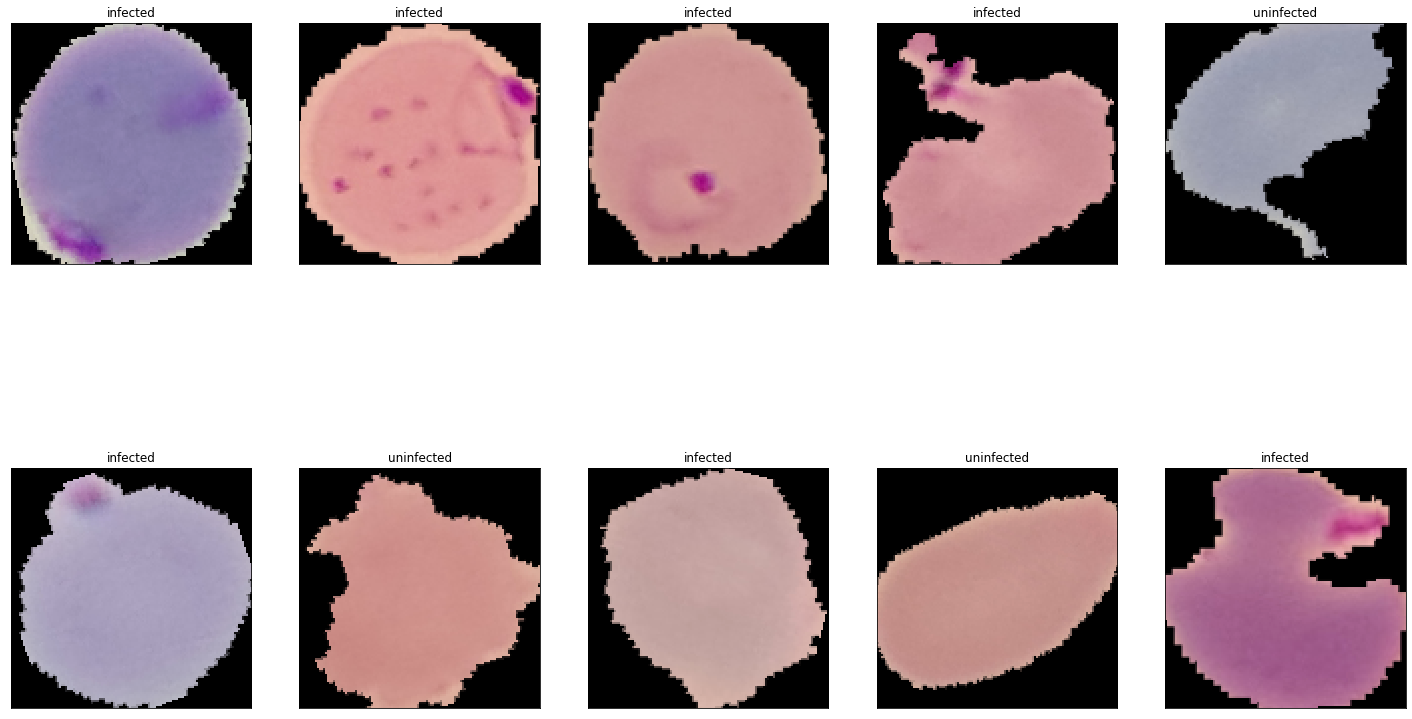

In [38]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(25, 15))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title=classes[labels[i]])
    imshow(images[i])
    print('Image Shape',images.shape) #[104, 3, 120, 120], 104-Batch_Size, 3 - channels, 120*120 - ImageSize
plt.show()

# Defining the model.

In [88]:
class MosquitoNet(nn.Module):
    def __init__(self):
        super(MosquitoNet,self).__init__()
    
        self.layer1=nn.Sequential(nn.Conv2d(3,16,kernel_size=5),
                             #nn.BatchNorm2d(16),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=2,stride=2)
                             )
    
        self.layer2=nn.Sequential(nn.Conv2d(16,32,kernel_size=3),
                             #nn.BatchNorm2d(32),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=2,stride=2)
                             )
    
        self.layer3=nn.Sequential(nn.Conv2d(32,108,kernel_size=3),
                             #nn.BatchNorm2d(108),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=2,stride=2)
                             )

        self.fc1=nn.Linear(108*13*13,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,240)
        self.fc4=nn.Linear(240,120)
        self.fc5=nn.Linear(120,2)


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)            
        out = self.layer3(out)
        out = out.view(out.size(0), -1)    # flatten out a input for Dense Layer
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        out = F.relu(out)
        out = self.fc4(out)
        out = F.relu(out)
        out = self.fc5(out)
        return out            

# Error and Optimization

In [89]:
model = MosquitoNet()
model.to(device)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

MosquitoNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 108, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=18252, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=240, bias=True)
  (fc4): Linear(in_features=240, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=2, bias=True)
)


# Training a Model

In [91]:
num_epochs = 2
batch_size = 100 

for epoch in range(num_epochs):
    train_loss = 0.
    model.train()    # explictily stating the training
    
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        train = images.view(-1, 3,120,120)
        outputs = model.forward(train)
        
        optimizer.zero_grad()
        loss = error(outputs, labels)
        loss.backward()    #back-propagation
        optimizer.step()
        
        train_loss += loss.item() * batch_size
     
    print("Epoch: {}, Loss: {:.4f}".format(epoch + 1, train_loss / len(train_loader.dataset)))

Epoch: 1, Loss: 0.2141
Epoch: 2, Loss: 0.1082


> Saving a model in disk

In [92]:
torch.save(model.state_dict(), "model.pt")

# Testing a model

In [93]:
correct = 0
total = 0
class_total = [0 for _ in range(2)]
class_correct = [0 for _ in range(2)]
batch_size = 58
# Lists used in Confusion Matrix
actual = []
predict = []

model.eval()    # explicitly stating the testing 
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to (device)
        
        actual.append(labels.data.tolist())
        test = images.view(-1, 3, 120, 120)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        predict.append(predicted.data.tolist())
        total += len(labels)
        correct += (predicted == labels).sum().item()
        # Calculating classwise accuracy
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        
print("Accuracy on the Test set: {:.2f}%".format(correct * 100 / total))
print()
for i in range(2):
    print("Accuracy of {} :  {:.2f}%   [{} / {}]".format(classes[i], class_correct[i] * 100 / class_total[i], 
                                           class_correct[i], class_total[i]))

Accuracy on the Test set: 95.68%

Accuracy of infected :  94.58%   [2617 / 2767]
Accuracy of uninfected :  96.79%   [2655 / 2743]


# Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

#flatten out 2D list into 1D
actual = list(itertools.chain.from_iterable(actual))
predict = list(itertools.chain.from_iterable(predict))


In [95]:
results = confusion_matrix(actual, predict)
print("Accuracy Score: ")
print("{:.4f}".format(accuracy_score(actual, predict)))
print()
print("Report: ")
print(classification_report(actual, predict))
print()
print("Confusion Matrix: ")
print(pd.DataFrame(results, columns=["Predicted No", "Predicted Yes"], index=["Actual No", "Actual Yes"]))

Accuracy Score: 
0.9568

Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2767
           1       0.95      0.97      0.96      2743

    accuracy                           0.96      5510
   macro avg       0.96      0.96      0.96      5510
weighted avg       0.96      0.96      0.96      5510


Confusion Matrix: 
            Predicted No  Predicted Yes
Actual No           2617            150
Actual Yes            88           2655


# Accuracy of the model is 95.68%